# ロジスティック回帰

ベルヌーイ分布に従う変数の統計的回帰モデルの一種．主に二値分類で使われる．

---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

これと同じ出力結果を目指す．

シグモイド関数(ロジスティック)の式
$$
\sigma = \frac{1}{1-e^{-x}}
$$
このとき$x$に代入するのは単純な線形回帰の式である．

$$
x = X\bm{w}
$$

知ってはいたけど単純に線形回帰の式の$w$を求めてシグモイド関数に通して二値分類してるわけではないね．\
内部ではどのようにcoefが求められているのだろう

ロジスティック回帰の流れ．
- ただの線形回帰だと二値分類に適さない．なぜかというと0,1を求めたいのにそれより上の値を取るから．すると，0より下は全て0で1より上は全て1のようになるのが適切だと思う．
- そこで出てくるのがロジスティック関数(シグモイド関数)
- シグモイド関数の$x$に線形回帰の式をそのまま代入する．
- そうすれば出力は簡単に0から1の間に収まるようになる，(これを予測確率として扱う)
- 求めるのはロジスティック関数の中の線形回帰の式のパラメータである
- このパラメータを点推定する．
- ここで出てくる手法は最小二乗法ではない(最小二乗法は正規分布のデータに対してパラメータを推定する手法だから)
- 今回の対象は0,1だからこれは試行回数1回の二項分布，従ってベルヌーイ分布となる．
- 従ってここでは最尤推定を使う．(分布はなんでもいいからね)
- 対数尤度をとる(計算しやすいから)
- で，ここでは代数的に，解析的に解を求めることができない．
- 従って，勾配降下法や確率的勾配降下法などを行なってパラメータを求めていく．
- SGDではおそらくこんな感じ．しかし，統計系の本を見るとニュートン法をしようしている．
- 従って今回はニュートン法(やってることは勾配降下法と変わらないが，二階微分を含むので計算量が多い)で解を求める．

線形分離可能なデータセットを作成する．\
線形非分離な問題についても後で突っ込んでみたいね．
- 線形非分離
- from sklearn.datasets import make_gaussian_quantiles

参考
- https://plantprogramer.com/data_generator/

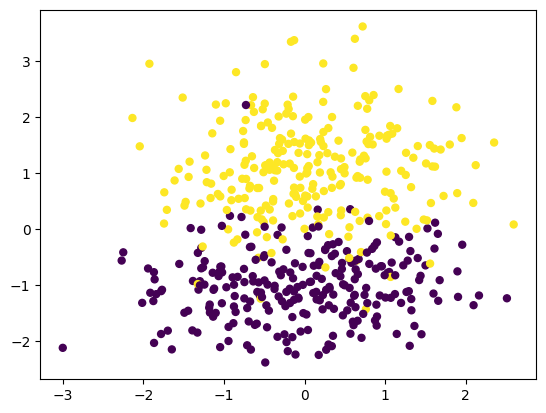

In [43]:
N = 500 #データの数
d = 2 # 次元数
K = 2 # クラス数

X, y = make_classification(
    n_samples=N,
    n_features=d,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=K,
    random_state = 7
)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25) #c=yで色指定できる

In [ ]:
model = LogisticRegression(

)